In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('2013_movies.csv')

In [4]:
df.tail()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
95,Rush,38000000.0,26947624,Ron Howard,R,123,2013-09-20 00:00:00
96,The Host,40000000.0,26627201,Andrew Niccol,PG-13,125,2013-03-29 00:00:00
97,The World's End,20000000.0,26004851,Edgar Wright,R,109,2013-08-23 00:00:00
98,21 and Over,13000000.0,25682380,Jon LucasScott Moore,R,93,2013-03-01 00:00:00
99,Her,23000000.0,25568251,Spike Jonze,R,120,2013-12-18 00:00:00


In [5]:
df.ReleaseDate = pd.to_datetime(df.ReleaseDate)

In [6]:
df.sort_values(['ReleaseDate'], inplace=True)

In [7]:
df.head()


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
70,Gangster Squad,60000000.0,46000903,Ruben Fleischer,R,113,2013-01-11
46,Mama,15000000.0,71628180,Andres Muschietti,PG-13,100,2013-01-18
63,Hansel and Gretel: Witch Hunters,50000000.0,55703475,Tommy Wirkola,R,88,2013-01-25


### Challenge 1

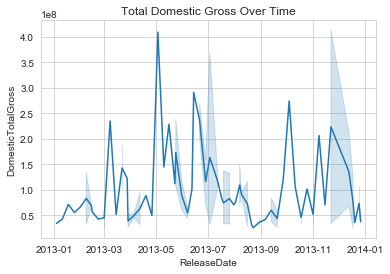

In [8]:
sns.lineplot(df.ReleaseDate, df.DomesticTotalGross).set_title('Total Domestic Gross Over Time')

### Challenge 2


In [9]:
df.sort_values(['Runtime'], inplace=True)

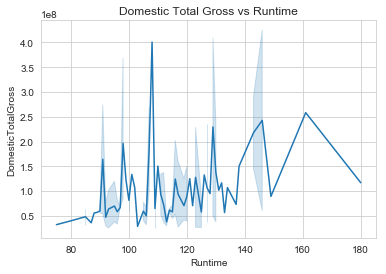

In [10]:
sns.lineplot(df.Runtime, df.DomesticTotalGross).set_title('Domestic Total Gross vs Runtime')

### Challenge 3

In [11]:
(df.groupby(['Rating'])['Runtime', 'DomesticTotalGross']
   .mean()
   .rename(columns={'Runtime': 'Average Runtime', 'DomesticTotalGross': 'Average Total Gross'}))

,Average Runtime,Average Total Gross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


### Challenge 4

In [12]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
86,Kevin Hart: Let Me Explain,NaN,32244051,NaN,R,75,2013-07-03
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
54,The Purge,3000000.0,64473115,James DeMonaco,R,85,2013-06-07
88,Scary Movie 5,20000000.0,32015787,Malcolm D. Lee,PG-13,85,2013-04-12
81,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20


In [13]:
g = df[df.Rating == 'G']
pg = df[df.Rating == 'PG']
pg13 = df[df.Rating == 'PG-13']
r = df[df.Rating == 'R']

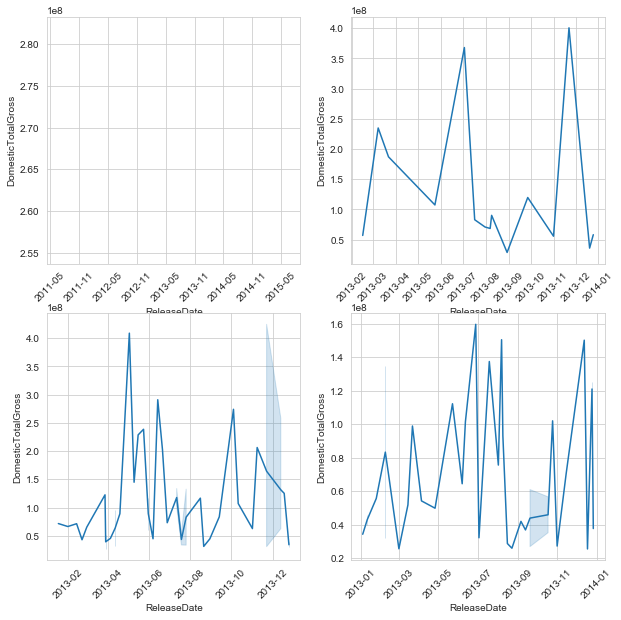

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

ax1 = sns.lineplot(g.ReleaseDate, g.DomesticTotalGross, ax=ax1)
for item in ax1.get_xticklabels():
    item.set_rotation(45)
ax2 = sns.lineplot(pg.ReleaseDate, pg.DomesticTotalGross, ax=ax2)
for item in ax2.get_xticklabels():
    item.set_rotation(45)
ax3 = sns.lineplot(pg13.ReleaseDate, pg13.DomesticTotalGross, ax=ax3)
for item in ax3.get_xticklabels():
    item.set_rotation(45)
ac4 = sns.lineplot(r.ReleaseDate, r.DomesticTotalGross, ax=ax4)
for item in ax4.get_xticklabels():
    item.set_rotation(45)

### Challenge 5

In [15]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
86,Kevin Hart: Let Me Explain,NaN,32244051,NaN,R,75,2013-07-03
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11
54,The Purge,3000000.0,64473115,James DeMonaco,R,85,2013-06-07
88,Scary Movie 5,20000000.0,32015787,Malcolm D. Lee,PG-13,85,2013-04-12
81,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20


In [16]:
df.groupby(df.Director)['DomesticTotalGross'].mean().sort_values(ascending=False).head(1)

Director
Francis Lawrence    424668047
Name: DomesticTotalGross, dtype: int64

### Challenge 6

In [17]:
df['Month'] = df['ReleaseDate'].dt.month
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Month
86,Kevin Hart: Let Me Explain,NaN,32244051,NaN,R,75,2013-07-03,7
76,A Haunted House,2500000.0,40041683,Michael Tiddes,R,80,2013-01-11,1
54,The Purge,3000000.0,64473115,James DeMonaco,R,85,2013-06-07,6
88,Scary Movie 5,20000000.0,32015787,Malcolm D. Lee,PG-13,85,2013-04-12,4
81,Walking with Dinosaurs,80000000.0,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20,12


In [18]:
std_dev = df.groupby(['Month'])['DomesticTotalGross'].std().reset_index().rename(columns={'DomesticTotalGross':'StdDev'})
mean_dom = df.groupby(['Month'])['DomesticTotalGross'].mean().reset_index().rename(columns={'DomesticTotalGross':'Mean'})
std_dev.head()

,Month,StdDev
0,1,1.465947e+07
1,2,3.283185e+07
2,3,7.323942e+07
3,4,2.530104e+07
4,5,1.117754e+08


In [19]:
mean_dom.head()

,Month,Mean
0,1,4.954324e+07
1,2,6.738601e+07
2,3,9.609710e+07
3,4,6.094072e+07
4,5,1.774097e+08


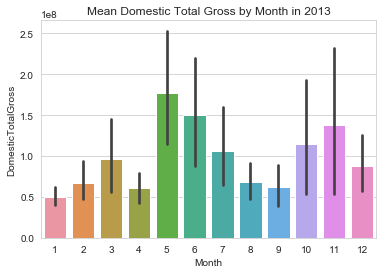

In [20]:
sns.barplot(df.Month, df.DomesticTotalGross).set_title('Mean Domestic Total Gross by Month in 2013')